Baseline for siyuanzhao implementation
====

Sample 70-30%. Exercises represented by skill id.
Program failed after epoch 40

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import pickle
import seaborn

from sklearn import metrics

In [3]:
seaborn.set_style('white')
seaborn.set_palette('colorblind')

In [4]:
training_preformances = pandas.DataFrame([[0.456, 0.676, 0.090],
[0.442, 0.726, 0.148],
[0.433, 0.746, 0.180],
[0.429, 0.757, 0.198],
[0.427, 0.763, 0.206],
[0.425, 0.768, 0.213],
[0.423, 0.772, 0.220],
[0.421, 0.775, 0.226],
[0.420, 0.778, 0.231],
[0.419, 0.781, 0.235],
[0.418, 0.783, 0.239],
[0.416, 0.787, 0.244],
[0.415, 0.789, 0.247],
[0.414, 0.791, 0.251],
[0.413, 0.793, 0.254],
[0.412, 0.796, 0.259],
[0.411, 0.798, 0.263],
[0.410, 0.800, 0.265],
[0.409, 0.802, 0.269],
[0.409, 0.803, 0.270],
[0.408, 0.805, 0.274],
[0.407, 0.805, 0.275],
[0.406, 0.808, 0.280],
[0.405, 0.810, 0.282],
[0.405, 0.810, 0.282],
[0.406, 0.809, 0.281],
[0.406, 0.808, 0.279],
[0.407, 0.807, 0.277],
[0.406, 0.808, 0.279],
[0.405, 0.811, 0.283],
[0.405, 0.811, 0.284],
[0.406, 0.809, 0.281],
[0.407, 0.808, 0.278],
[0.405, 0.811, 0.282],
[0.406, 0.809, 0.280],
[0.405, 0.812, 0.285],
[0.403, 0.815, 0.290],
[0.402, 0.817, 0.294],
[0.402, 0.817, 0.294],
[0.405, 0.811, 0.283],
[0.411, 0.799, 0.261]], columns=['rmse', 'auc', 'r2'])
training_preformances['iteration'] = range(1, training_preformances.shape[0] + 1)
training_preformances['type'] = 'training'

In [5]:
testing_performances = pandas.DataFrame([[5, 0.431, 0.748, 0.178],
[10, 0.430, 0.751, 0.183],
[15, 0.432, 0.748, 0.176],
[20, 0.434, 0.744, 0.165],
[25, 0.436, 0.739, 0.159],
[30, 0.436, 0.740, 0.159],
[35, 0.437, 0.737, 0.157],
[40, 0.439, 0.733, 0.148]], columns=['iteration', 'rmse', 'auc', 'r2'])
testing_performances['type'] = 'testing'

In [9]:
sz_general_result = pandas.concat([training_preformances, testing_performances])

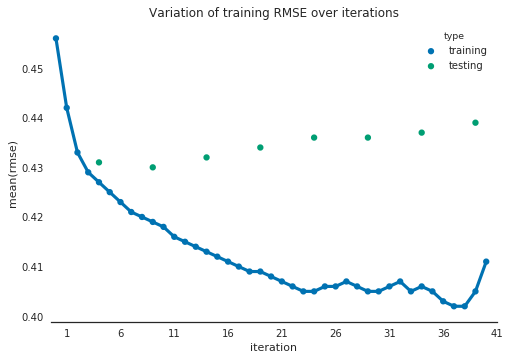

In [10]:
seaborn.pointplot(x="iteration", y="rmse", data=sz_general_result, hue='type', markers='.', linestyles='-')
plt.title('Variation of training RMSE over iterations')
seaborn.despine(left=True)
plt.xticks(range(1, general_result.iteration.max()+1, 5), range(1, general_result.iteration.max()+1, 5))
plt.show()

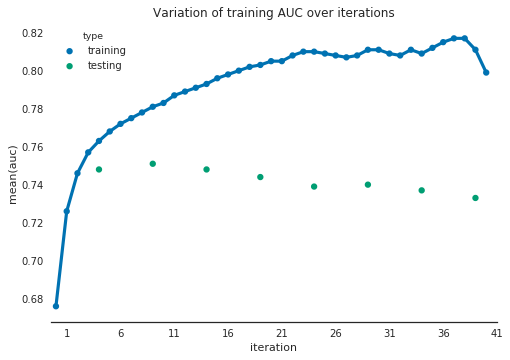

In [11]:
seaborn.pointplot(x="iteration", y="auc", data=sz_general_result, hue='type', markers='.', linestyles='-')
plt.title('Variation of training AUC over iterations')
seaborn.despine(left=True)
plt.xticks(range(1, general_result.iteration.max()+1, 5), range(1, general_result.iteration.max()+1, 5))
plt.show()

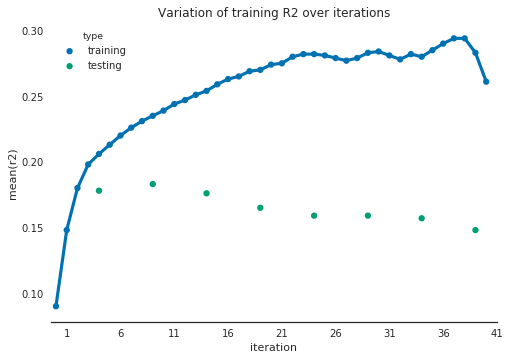

In [12]:
seaborn.pointplot(x="iteration", y="r2", data=sz_general_result, hue='type', markers='.', linestyles='-')
plt.title('Variation of training R2 over iterations')
seaborn.despine(left=True)
plt.xticks(range(1, general_result.iteration.max()+1, 5), range(1, general_result.iteration.max()+1, 5))
plt.show()

Baseline for LSTM Tensorflow implementation
====

The experiment configuration is the following
 - Training, test, validation partition of 0.7, 0.2, 0.1
 - hidden_layer_size: 200, batch_size: 50,
 - training_epochs: 1000, max_num_steps: 100
 - Exercises represented by skill id


Validation results
---

In [4]:
lstm_results = pandas.DataFrame([
        [50, 0.319242119789**2],
        [100, 0.395422786474**2],
        [150, 0.406739830971**2],
        [200, 0.410216480494**2],
        [250, 0.413854688406**2],
        [300, 0.418674409389**2],
        [350, 0.424994558096**2],
        [400, 0.417945146561**2],
        [450, 0.410875618458**2],
    ], columns=['iteration', 'r2'])
lstm_results['type'] = 'validation'

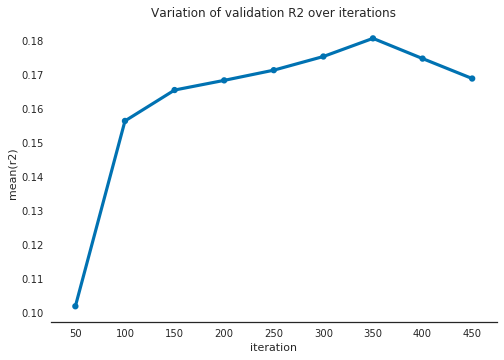

In [5]:
seaborn.pointplot(x="iteration", y="r2", data=lstm_results, markers='.', linestyles='-')
plt.title('Variation of validation R2 over iterations')
seaborn.despine(left=True)
plt.show()

Testing results
---

In [6]:
test_prediction_file = '../../results/dkt_lstm/by_skill_id/predictions.p'

with open(test_prediction_file, 'r') as prediction_file:
    predictions = pickle.load(prediction_file)

ROC curve metrics

In [7]:
def get_auc_roc_curve(true, predicted):
    results = []
    ignored_sequences = 0
    for true_sequence, predicted_sequence in zip(true, predicted):
        try:
            results.append([metrics.roc_auc_score(true_sequence, predicted_sequence),
                            true_sequence.shape[0]])
        except ValueError:
            ignored_sequences += 1
    print '{} sequences with only one class, ignoring.'.format(ignored_sequences)
    return pandas.DataFrame(results, columns=['AUC', 'Sequence lenght'])

def get_mean_auc_roc_curve(true, predicted):
    all_true = numpy.concatenate(true)
    all_predicted = numpy.concatenate(predicted)
    return metrics.roc_auc_score(all_true, all_predicted)

In [8]:
aucs = get_auc_roc_curve(*predictions)

114 sequences with only one class, ignoring.


In [9]:
get_mean_auc_roc_curve(*predictions)

0.72257055020447392

In [10]:
aucs.describe()

,AUC,Sequence lenght
count,686.000000,686.000000
mean,0.671051,85.588921
std,0.180798,157.650237
min,0.125000,2.000000
25%,0.574441,12.000000
50%,0.666945,27.500000
75%,0.768497,79.750000
max,1.000000,1261.000000


#### Root Mean Squared Error

In [11]:
def get_rmse(true, predicted):
    results = []
    for true_sequence, predicted_sequence in zip(true, predicted):
        results.append([metrics.mean_squared_error(true_sequence, predicted_sequence)**0.5,
                        true_sequence.shape[0]])
    return pandas.DataFrame(results, columns=['RMSE', 'Sequence lenght'])

def get_mean_rmse(true, predicted):
    all_true = numpy.concatenate(true)
    all_predicted = numpy.concatenate(predicted)
    return metrics.mean_squared_error(all_true, all_predicted)**0.5

In [12]:
rmse_results = get_rmse(*predictions)
rmse_results.describe()

,RMSE,Sequence lenght
count,800.000000,800.000000
mean,0.406330,74.010000
std,0.118977,148.717807
min,0.000182,1.000000
25%,0.375463,8.000000
50%,0.436827,21.000000
75%,0.475653,67.250000
max,0.799115,1261.000000


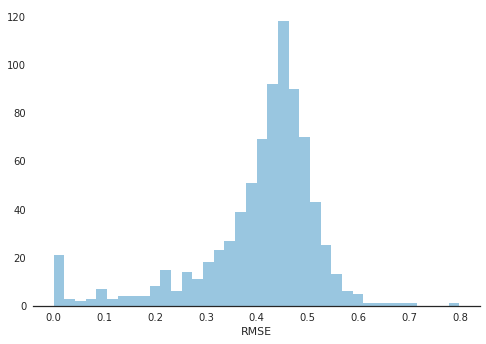

In [13]:
seaborn.distplot(rmse_results.RMSE, kde=False)
seaborn.despine(left=True)

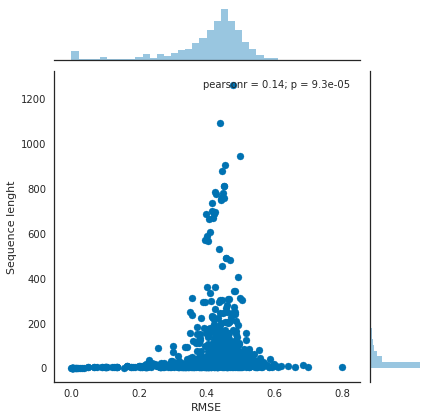

In [14]:
seaborn.jointplot(x='RMSE', y='Sequence lenght', data=rmse_results)

#### R2 results

In [18]:
def get_r2(true, predicted):
    results = []
    for true_sequence, predicted_sequence in zip(true, predicted):
        results.append([metrics.r2_score(true_sequence, predicted_sequence),
                        true_sequence.shape[0]])
    return pandas.DataFrame(results, columns=['R2', 'Sequence lenght'])

def get_mean_r2(true, predicted):
    all_true = numpy.concatenate(true)
    all_predicted = numpy.concatenate(predicted)
    return metrics.r2_score(all_true, all_predicted)

In [19]:
get_mean_r2(*predictions)

0.13735010641325673

In [20]:
r2s = get_r2(*predictions)
r2s.describe()

,R2,Sequence lenght
count,800.000000,800.000000
mean,-0.066711,74.010000
std,0.452371,148.717807
min,-5.698115,1.000000
25%,-0.109521,8.000000
50%,0.000000,21.000000
75%,0.083672,67.250000
max,0.806120,1261.000000


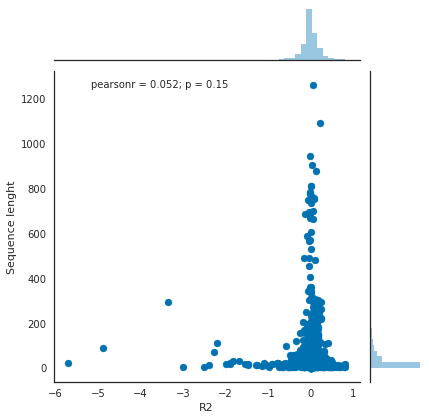

In [21]:
seaborn.jointplot(x='R2', y='Sequence lenght', data=r2s)

----

Baseline for LSTM Tensorflow implementation with dropout
====

The experiment configuration is the following
 - Training, test, validation partition of 0.7, 0.2, 0.1
 - hidden_layer_size: 200, batch_size: 50,
 - training_epochs: 1000, max_num_steps: 100
 - Exercises represented by skill id
 - Dropout ratio 0.3


Validation results
---

In [22]:
lstm_results = pandas.DataFrame([
        [50, 0.359974056482**2],
        [100, 0.369967281818**2],
        [150, 0.383235901594**2],
        [200, 0.386100798845**2],
        [250, 0.386364579201**2],
        [300, 0.377304136753**2],
        [350, 0.37688100338**2],
        [400, 0.383031666279**2],
        [450, 0.380858004093**2],
    ], columns=['iteration', 'r2'])
lstm_results['type'] = 'validation'

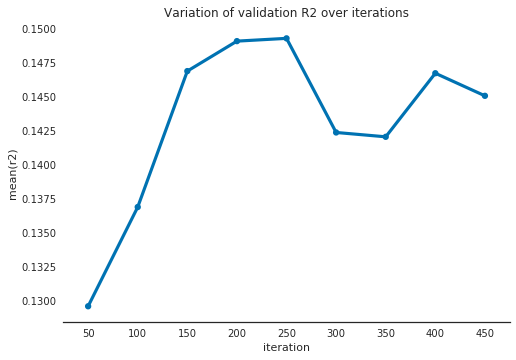

In [23]:
seaborn.pointplot(x="iteration", y="r2", data=lstm_results, markers='.', linestyles='-')
plt.title('Variation of validation R2 over iterations')
seaborn.despine(left=True)
plt.show()

Testing results
---

In [24]:
test_prediction_file = '../../results/dkt_lstm/by_skill_id/dropout/predictions.p'

with open(test_prediction_file, 'r') as prediction_file:
    predictions = pickle.load(prediction_file)

#### ROC curve metrics

In [25]:
aucs = get_auc_roc_curve(*predictions)

117 sequences with only one class, ignoring.


In [26]:
get_mean_auc_roc_curve(*predictions)

0.7320569259494607

In [27]:
aucs.describe()

,AUC,Sequence lenght
count,683.000000,683.000000
mean,0.679887,80.871157
std,0.168406,144.549835
min,0.000000,2.000000
25%,0.586385,13.000000
50%,0.680000,28.000000
75%,0.775225,85.000000
max,1.000000,1058.000000


#### Root Mean Squared Error

In [28]:
get_mean_rmse(*predictions)

0.4352170475251439

In [29]:
rmse_results = get_rmse(*predictions)
rmse_results.describe()

,RMSE,Sequence lenght
count,800.000000,800.000000
mean,0.394880,69.748750
std,0.121282,136.238033
min,0.000075,1.000000
25%,0.358613,9.000000
50%,0.426594,21.000000
75%,0.470621,69.500000
max,0.647273,1058.000000


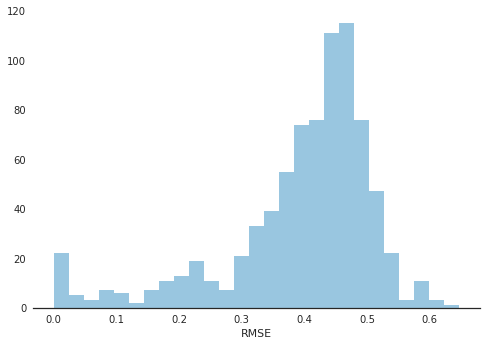

In [30]:
seaborn.distplot(rmse_results.RMSE, kde=False)
seaborn.despine(left=True)

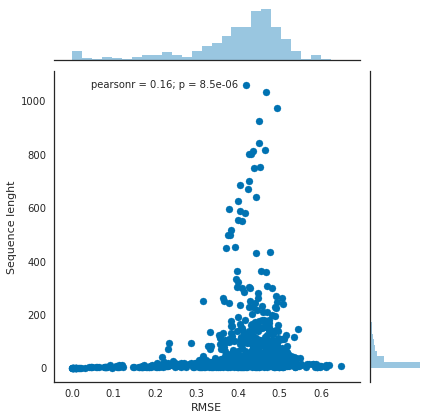

In [31]:
seaborn.jointplot(x='RMSE', y='Sequence lenght', data=rmse_results)

#### R2 results

In [33]:
get_mean_r2(*predictions)

0.15219871491938541

In [34]:
r2s = get_r2(*predictions)
r2s.describe()

,R2,Sequence lenght
count,800.000000,800.000000
mean,-0.030780,69.748750
std,0.312979,136.238033
min,-3.680874,1.000000
25%,-0.070539,9.000000
50%,0.000000,21.000000
75%,0.097189,69.500000
max,0.777887,1058.000000


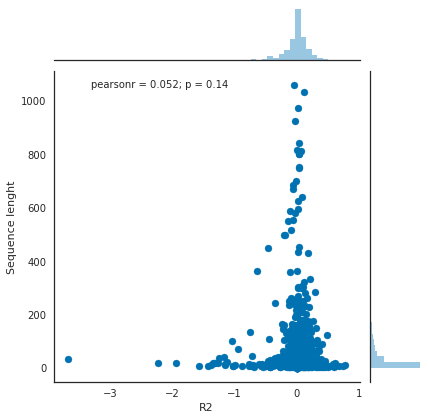

In [35]:
seaborn.jointplot(x='R2', y='Sequence lenght', data=r2s)

----

Baseline for LSTM Tensorflow implementation with dropout TEMPLATE ID
====

The experiment configuration is the following
 - Training, test, validation partition of 0.7, 0.2, 0.1
 - hidden_layer_size: 200, batch_size: 50,
 - training_epochs: 1000, max_num_steps: 100
 - Exercises represented by **template** id
 - Dropout ratio 0.3


Validation results
---

In [36]:
lstm_results = pandas.DataFrame([
        [50, 0.328122496605**2],
        [100, 0.375162899494**2],
        [150, 0.4018689394**2],
        [200, 0.394581645727**2],
        [250, 0.386446595192**2],
        [300, 0.392734974623**2],
        [350, 0.393640160561**2],
        [400, 0.390168100595**2],
        [450, 0.373020291328**2],
    ], columns=['iteration', 'r2'])
lstm_results['type'] = 'validation'

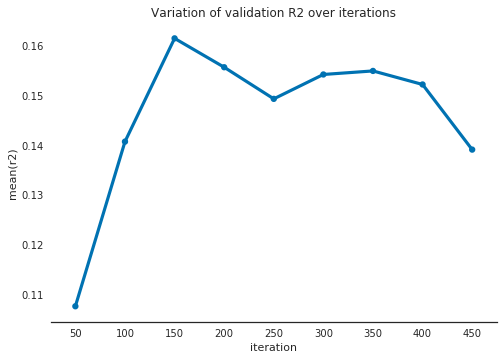

In [37]:
seaborn.pointplot(x="iteration", y="r2", data=lstm_results, markers='.', linestyles='-')
plt.title('Variation of validation R2 over iterations')
seaborn.despine(left=True)
plt.show()

Testing results
---

In [38]:
test_prediction_file = '../../results/dkt_lstm/by_template_id/predictions.p'

with open(test_prediction_file, 'r') as prediction_file:
    predictions = pickle.load(prediction_file)

#### ROC curve metrics

In [39]:
aucs = get_auc_roc_curve(*predictions)

99 sequences with only one class, ignoring.


In [40]:
get_mean_auc_roc_curve(*predictions)

0.73248786214422468

In [41]:
aucs.describe()

,AUC,Sequence lenght
count,701.000000,701.000000
mean,0.707380,84.793153
std,0.161614,152.272280
min,0.117647,2.000000
25%,0.625000,13.000000
50%,0.701058,27.000000
75%,0.800000,82.000000
max,1.000000,1075.000000


#### Root Mean Squared Error

In [44]:
get_mean_rmse(*predictions)

0.44357086931660289

In [45]:
rmse_results = get_rmse(*predictions)
rmse_results.describe()

,RMSE,Sequence lenght
count,800.000000,800.000000
mean,0.411021,74.892500
std,0.109294,144.950584
min,0.003789,1.000000
25%,0.366502,9.000000
50%,0.433878,21.000000
75%,0.475096,65.250000
max,0.758601,1075.000000


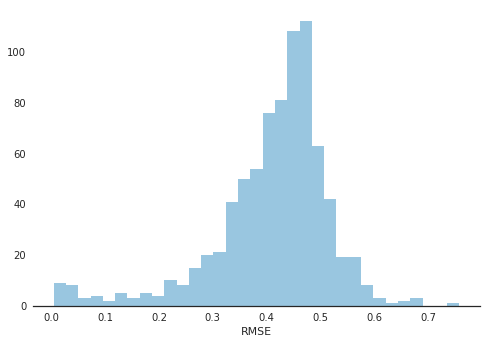

In [46]:
seaborn.distplot(rmse_results.RMSE, kde=False)
seaborn.despine(left=True)

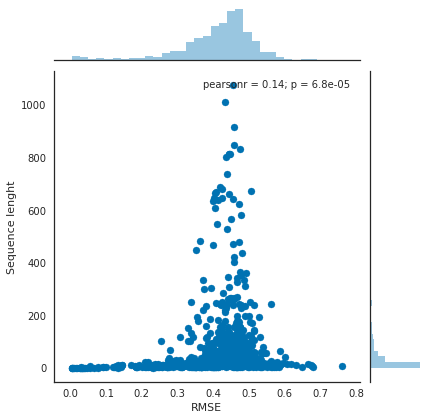

In [47]:
seaborn.jointplot(x='RMSE', y='Sequence lenght', data=rmse_results)

#### R2 results

In [48]:
get_mean_r2(*predictions)

0.14345107976990801

In [49]:
r2s = get_r2(*predictions)
r2s.describe()

,R2,Sequence lenght
count,800.000000,800.000000
mean,-0.074839,74.892500
std,0.478486,144.950584
min,-6.103520,1.000000
25%,-0.123478,9.000000
50%,0.000000,21.000000
75%,0.106532,65.250000
max,0.853443,1075.000000


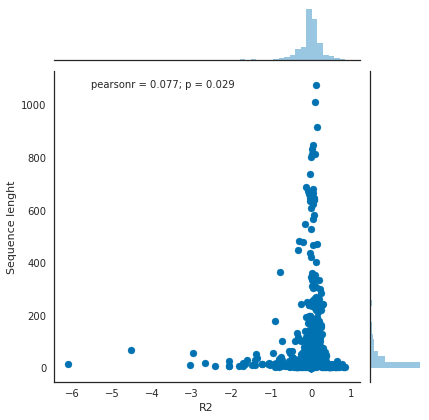

In [50]:
seaborn.jointplot(x='R2', y='Sequence lenght', data=r2s)